# Cross-Match CMD

In [2]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

Table1 = Table.read('C:/Users/dougl/Downloads/TAABLE1.csv', format = 'csv')
Table2 = Table.read('C:/Users/dougl/Downloads/TAABLE2.csv', format = 'csv')

In [3]:
print(Table1[1].columns)

<TableColumns names=('angDist','col1','col2','col3','objID','RAJ2000','DEJ2000','errHalfMaj','errHalfMin','errPosAng','f_objID','Qual','Epoch','Ns','Nd','gmag','e_gmag','gKmag','e_gKmag','gFlags','rmag','e_rmag','rKmag','e_rKmag','rFlags','imag','e_imag','iKmag','e_iKmag','iFlags','zmag','e_zmag','zKmag','e_zKmag','zFlags','ymag','e_ymag','yKmag','e_yKmag','yFlags')>


In [4]:
print(Table1)

angDist     col1          col2        ...  yKmag  e_yKmag  yFlags 
-------- --------- ------------------ ... ------- ------- --------
0.057849       0.0  45.13214374784831 ... 12.1815  0.0072   115000
0.123086       1.0  45.05816745630085 ... 12.0432     0.0 16892216
0.022582       2.0  45.03433652674343 ... 10.0428   0.001       16
0.217994       3.0  45.16500808636506 ...      --      --    98404
0.056387       4.0 45.234476412246075 ...      --      --   114724
0.001773       5.0  45.08615519019486 ...      --      --   114788
0.009829       6.0  45.06654206842413 ... 11.1544   0.001 16777232
0.122394       7.0  45.20459588312845 ...  12.063  0.0085 16892216
 0.03493       8.0  45.19462195720764 ... 12.8845  0.0024   115000
0.045484      10.0  45.14137055885093 ... 11.3858   0.031   114744
     ...       ...                ... ...     ...     ...      ...
0.229234 3591619.0  276.1483722093576 ...      --      --    98340
 0.02363 3591620.0 276.05034136335246 ...      --      --   11

In [5]:
Gmag1 = np.array(Table1["gmag"])
Rmag1 = np.array(Table1["rmag"])
Imag1 = np.array(Table1["imag"])
Zmag1 = np.array(Table1["zmag"])
Ymag1 = np.array(Table1["ymag"])
idx1 = np.array(Table1["col1"])

Gmag2 = np.array(Table2["gmag"])
Rmag2 = np.array(Table2["rmag"])
Imag2 = np.array(Table2["imag"])
Zmag2 = np.array(Table2["zmag"])
Ymag2 = np.array(Table2["ymag"])
idx2 = np.array(Table2["col1"])

Gmag = np.concatenate((Gmag1, Gmag2), axis=0)
Rmag = np.concatenate((Rmag1, Rmag2), axis=0)
Imag = np.concatenate((Imag1, Imag2), axis=0)
Zmag = np.concatenate((Zmag1, Zmag2), axis=0)
Ymag = np.concatenate((Ymag1, Ymag2), axis=0)
idx = np.concatenate((idx1, idx2), axis=0)
idx = idx.astype(np.int64)


In [6]:
data_table = Table.read('C:/Users/dougl/Desktop/Marchetti data/data.fits', format = 'fits')

In [7]:
X = []
Y = []
Z = []
R = []
U = []
V = []
W = []
dist = []

for i in idx:
    X.append(data_table["xGC"][i])
    Y.append(data_table["yGC"][i])
    Z.append(data_table["zGC"][i])
    R.append(data_table["RGC"][i])
    U.append(data_table["U"][i])
    V.append(data_table["V"][i])
    W.append(data_table["W"][i])
    dist.append(data_table["dist"][i])

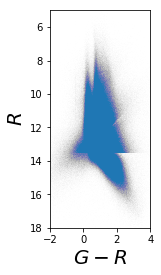

In [8]:
plt.scatter(Gmag-Rmag, Rmag, s=0.002, alpha=0.04)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-2,4)
plt.ylim(18,5)
plt.xlabel("$G-R$", fontsize=20)
plt.ylabel("$R$", fontsize=20)
plt.gca().set_aspect("equal",adjustable="box")

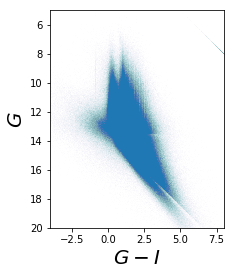

In [9]:
plt.scatter(Gmag-Imag, Gmag, s=0.004, alpha=0.04)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-4,8)
plt.ylim(20,5)
plt.xlabel("$G-I$", fontsize=20)
plt.ylabel("$G$", fontsize=20)
plt.gca().set_aspect("equal",adjustable="box")

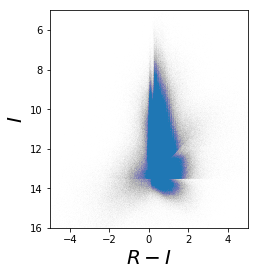

In [10]:
plt.scatter(Rmag-Imag, Imag, s=0.002, alpha=0.02)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-5,5)
plt.ylim(16,5)
plt.xlabel("$R-I$", fontsize=20)
plt.ylabel("$I$", fontsize=20)
plt.gca().set_aspect("equal",adjustable="box")

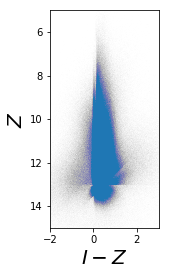

In [11]:
plt.scatter(Imag-Zmag, Zmag, s=0.004, alpha=0.02)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-2,3)
plt.ylim(15,5)
plt.xlabel("$I-Z$", fontsize=20)
plt.ylabel("$Z$", fontsize=20)
plt.gca().set_aspect("equal",adjustable="box")

In [12]:
X_Close = []
Y_Close = []
Gmag_Close = []
Rmag_Close = []
Imag_Close = []
Zmag_Close = []
Ymag_Close = []
dist_Close = []

for i in range(0,len(X)-1):
    X_loop = X[i] + 8000
    Y_loop = Y[i]
    Gmag_loop = Gmag[i]
    Rmag_loop = Rmag[i]
    Imag_loop = Imag[i]
    Zmag_loop = Zmag[i]
    Ymag_loop = Ymag[i]
    dist_loop = dist[i]
    
    r_squared = X_loop**2 + Y_loop**2
    
    if r_squared <= 10000:
        X_Close.append(X_loop*0.001 - 8)
        Y_Close.append(Y_loop*0.001)
        Gmag_Close.append(Gmag_loop)
        Rmag_Close.append(Rmag_loop)
        Imag_Close.append(Imag_loop)
        Zmag_Close.append(Zmag_loop)
        Ymag_Close.append(Ymag_loop)
        dist_Close.append(dist_loop)
        
Gmag_Close = np.array(Gmag_Close)
Rmag_Close = np.array(Rmag_Close)
Imag_Close = np.array(Imag_Close)
Zmag_Close = np.array(Zmag_Close)
Ymag_Close = np.array(Ymag_Close)
dist_Close = np.array(dist_Close)

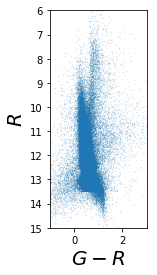

In [13]:
plt.scatter(Gmag_Close-Rmag_Close, Rmag_Close, s=0.02, alpha=0.4)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-1,3)
plt.ylim(15,6)
plt.xlabel("$G-R$", fontsize=20)
plt.ylabel("$R$", fontsize=20)
plt.gca().set_aspect("equal",adjustable="box")

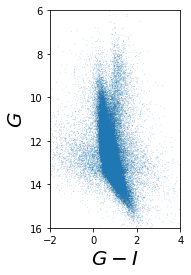

In [14]:
plt.scatter(Gmag_Close-Imag_Close, Gmag_Close, s=0.02, alpha=0.4)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-2,4)
plt.ylim(16,6)
plt.xlabel("$G-I$", fontsize=20)
plt.ylabel("$G$", fontsize=20)
plt.gca().set_aspect("equal",adjustable="box")

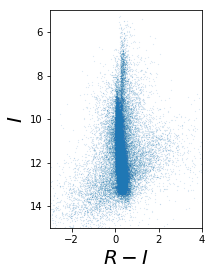

In [15]:
plt.scatter(Rmag_Close-Imag_Close, Imag_Close, s=0.02, alpha=0.4)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-3,4)
plt.ylim(15,5)
plt.xlabel("$R-I$", fontsize=20)
plt.ylabel("$I$", fontsize=20)
plt.gca().set_aspect("equal",adjustable="box")

Text(0,0.5,'$Z$')

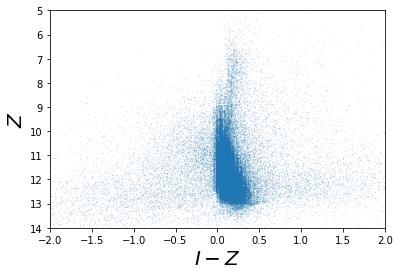

In [16]:
plt.scatter(Imag_Close-Zmag_Close, Zmag_Close, s=0.02, alpha=0.4)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-2,2)
plt.ylim(14,5)
plt.xlabel("$I-Z$", fontsize=20)
plt.ylabel("$Z$", fontsize=20)
#plt.gca().set_aspect("equal",adjustable="box")

Text(0,0.5,'$AbsGmag$')

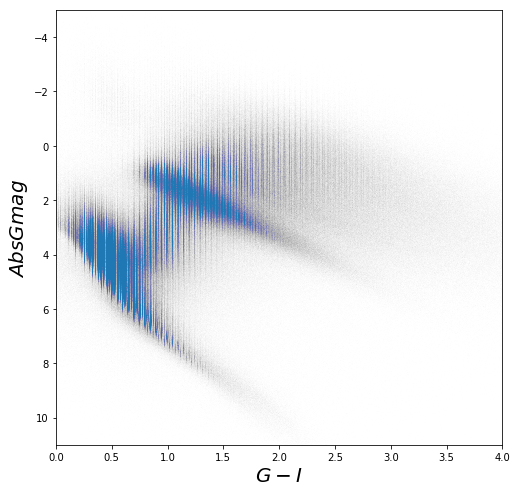

In [17]:
Abs_Gmag1 = Gmag - 5*np.log10(dist) + 5
Abs_Gmag2 = Gmag_Close - 5*np.log10(dist_Close) + 5
plt.figure(figsize=(8,8))
plt.scatter(Gmag-Imag, Abs_Gmag1, s=0.004, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0,4)
plt.ylim(11,-5)
plt.xlabel("$G-I$", fontsize=20)
plt.ylabel("$AbsGmag$", fontsize=20)
#plt.gca().set_aspect("equal",adjustable="box")

Text(0,0.5,'$AbsGmag$')

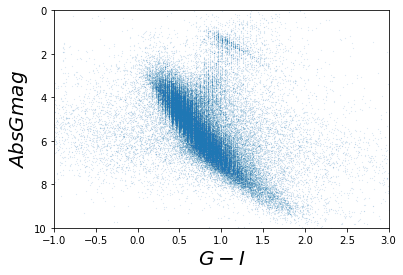

In [18]:
plt.scatter(Gmag_Close-Imag_Close, Abs_Gmag2, s=0.02, alpha=0.4)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-1,3)
plt.ylim(10,0)
plt.xlabel("$G-I$", fontsize=20)
plt.ylabel("$AbsGmag$", fontsize=20)
#plt.gca().set_aspect("equal",adjustable="box")

Text(0,0.5,'$AbsRmag$')

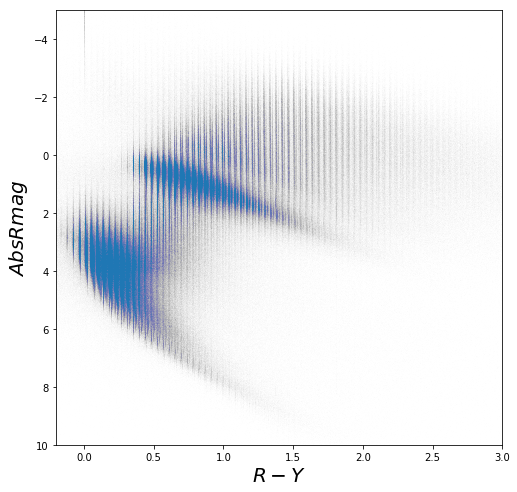

In [19]:
Abs_Rmag = Rmag - 5*np.log10(dist) + 5
plt.figure(figsize=(8,8))
plt.scatter(Rmag-Ymag, Abs_Rmag, s=0.004, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-0.2,3)
plt.ylim(10,-5)
plt.xlabel("$R-Y$", fontsize=20)
plt.ylabel("$AbsRmag$", fontsize=20)

Text(0,0.5,'$AbsRmag$')

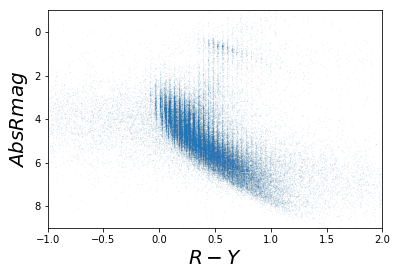

In [20]:
Abs_Rmag2 = Rmag_Close - 5*np.log10(dist_Close) + 5
plt.scatter(Rmag_Close-Ymag_Close, Abs_Rmag2, s=0.02, alpha=0.2)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-1,2)
plt.ylim(9,-1)
plt.xlabel("$R-Y$", fontsize=20)
plt.ylabel("$AbsRmag$", fontsize=20)

# Gaia DR2 Cross-Match

In [21]:
Gaia_table1 = Table.read('C:/Users/dougl/Downloads/gaia1.csv', format = 'csv')
Gaia_table2 = Table.read('C:/Users/dougl/Downloads/gaia2.csv', format = 'csv')

In [22]:
print(Gaia_table1[1].columns)

<TableColumns names=('angDist','col1','col2','col3','ra_epoch2000','dec_epoch2000','errHalfMaj','errHalfMin','errPosAng','source_id','ra','ra_error','dec','dec_error','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','duplicated_source','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_mag','phot_bp_mean_flux','phot_bp_mean_flux_error','phot_bp_mean_mag','phot_rp_mean_flux','phot_rp_mean_flux_error','phot_rp_mean_mag','bp_rp','radial_velocity','radial_velocity_error','teff_val','a_g_val','e_bp_min_rp_val','radius_val','lum_val')>


In [23]:
Gaia_Gmag1 = np.array(Gaia_table1["phot_g_mean_mag"])
Gaia_Gmag2 = np.array(Gaia_table2["phot_g_mean_mag"])
Gaia_BPmag1 = np.array(Gaia_table1["phot_bp_mean_mag"])
Gaia_BPmag2 = np.array(Gaia_table2["phot_bp_mean_mag"])
Gaia_RPmag1 = np.array(Gaia_table1["phot_rp_mean_mag"])
Gaia_RPmag2 = np.array(Gaia_table2["phot_rp_mean_mag"])
Extinction1 = np.array(Gaia_table1["a_g_val"])
Extinction2 = np.array(Gaia_table2["a_g_val"])
Color_exc1 = np.array(Gaia_table1["e_bp_min_rp_val"])
Color_exc2 = np.array(Gaia_table2["e_bp_min_rp_val"])
g_idx1 = np.array(Gaia_table1["col1"])
g_idx2 = np.array(Gaia_table2["col1"])

Gaia_Gmag = np.concatenate((Gaia_Gmag1, Gaia_Gmag2), axis=0)
Gaia_BPmag = np.concatenate((Gaia_BPmag1, Gaia_BPmag2), axis=0)
Gaia_RPmag = np.concatenate((Gaia_RPmag1, Gaia_RPmag2), axis=0)
Extinction = np.concatenate((Extinction1, Extinction2), axis=0)
Color_exc = np.concatenate((Color_exc1, Color_exc2), axis=0)
g_idx = np.concatenate((g_idx1, g_idx2), axis=0)
g_idx = g_idx.astype(np.int64)

In [24]:
Gaia_X = []
Gaia_Y = []
Gaia_Z = []
Gaia_R = []
Gaia_U = []
Gaia_V = []
Gaia_W = []
Gaia_dist = []

for j in g_idx:
    Gaia_X.append(data_table["xGC"][j])
    Gaia_Y.append(data_table["yGC"][j])
    Gaia_Z.append(data_table["zGC"][j])
    Gaia_R.append(data_table["RGC"][j])
    Gaia_U.append(data_table["U"][j])
    Gaia_V.append(data_table["V"][j])
    Gaia_W.append(data_table["W"][j])
    Gaia_dist.append(data_table["dist"][j])

Text(0,0.5,'$M_G$')

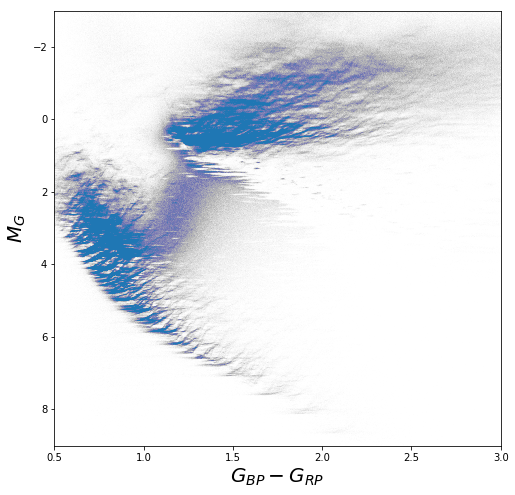

In [25]:
Abs_gaiaGmag = Gaia_Gmag - 5*np.log10(Gaia_dist) + 5 - Extinction
plt.figure(figsize=(8,8))
plt.scatter(Gaia_BPmag - Gaia_RPmag, Abs_gaiaGmag, s=0.0037, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0.5,3)
plt.ylim(9,-3)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize=20)
plt.ylabel("$M_G$", fontsize=20)

In [26]:
G_X_Close = []
G_Y_Close = []
G_Z_Close = []
G_Gmag_Close = []
G_GBPmag_Close = []
G_GRPmag_Close = []
G_Exct_Close = []
G_ColorE_Close = []
G_dist_Close = []

for i in range(0,len(Gaia_X)-1):
    X_loop = Gaia_X[i] + 8000
    Z_loop = Gaia_Z[i] - 25
    Y_loop = Gaia_Y[i]
    Gmag_loop = Gaia_Gmag[i]
    GBPmag_loop = Gaia_BPmag[i]
    GRPmag_loop = Gaia_RPmag[i]
    Exct_loop = Extinction[i]
    ColorE_loop = Color_exc[i]
    dist_loop = Gaia_dist[i]
    
    r_squared = X_loop**2 + Y_loop**2
    
    if r_squared <= 10000:
        G_X_Close.append(X_loop*0.001 - 8)
        G_Y_Close.append(Y_loop*0.001)
        G_Z_Close.append((Z_loop + 25)*0.001)
        G_Gmag_Close.append(Gmag_loop)
        G_GBPmag_Close.append(GBPmag_loop)
        G_GRPmag_Close.append(GRPmag_loop)
        G_Exct_Close.append(Exct_loop)
        G_ColorE_Close.append(ColorE_loop)
        G_dist_Close.append(dist_loop)
        
G_Z_Close = np.array(G_Z_Close)
G_Gmag_Close = np.array(G_Gmag_Close)
G_GBPmag_Close = np.array(G_GBPmag_Close)
G_GRPmag_Close = np.array(G_GRPmag_Close)
G_Exct_Close = np.array(G_Exct_Close)
G_ColorE_Close = np.array(G_ColorE_Close)
G_dist_Close = np.array(G_dist_Close)

In [27]:
G_Abs_Gmag_Close = G_Gmag_Close - 5*np.log10(G_dist_Close) + 5 - G_Exct_Close

Text(0,0.5,'$M_G$')

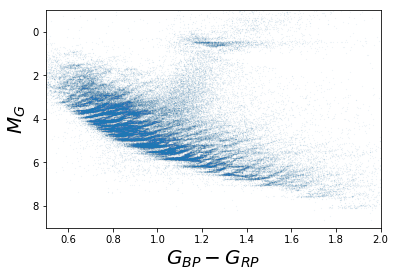

In [28]:
plt.scatter(G_GBPmag_Close - G_GRPmag_Close, G_Abs_Gmag_Close, s=0.02, alpha=0.2)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0.5,2)
plt.ylim(9,-1)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize=20)
plt.ylabel("$M_G$", fontsize=20)

(9, -1)

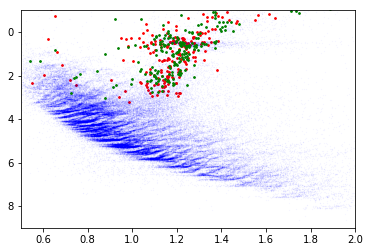

In [29]:
BPRP = G_GBPmag_Close - G_GRPmag_Close

X1 = []
X2 = []
X3 = []
Y1 = []
Y2 = []
Y3 = []

for i in range(0,len(G_Abs_Gmag_Close)-1):
    if G_Z_Close[i] >= -1.0 and G_Z_Close[i] <= 1.0:
        X1.append(BPRP[i])
        Y1.append(G_Abs_Gmag_Close[i])
    
    elif G_Z_Close[i] > 1.0:
        X2.append(BPRP[i])
        Y2.append(G_Abs_Gmag_Close[i])

    elif G_Z_Close[i] < -1.0:
        X3.append(BPRP[i])
        Y3.append(G_Abs_Gmag_Close[i])

plt.scatter(X2,Y2,s=3, c='r')
plt.scatter(X1,Y1, s=0.02, alpha=0.1, c='b')
plt.scatter(X3,Y3,s=3, c='g')
plt.ylim(reversed(plt.ylim()))
plt.xlim(0.5,2)
plt.ylim(9,-1)

C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


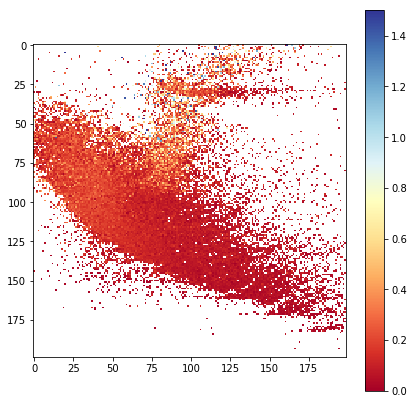

In [30]:
bin_x = np.arange(0.5,2, step=0.0075)
bin_y = np.arange(-1,9, step=0.05)
H, xed, yed = np.histogram2d(BPRP, G_Abs_Gmag_Close, bins=(bin_x,bin_y))

Z_Graph = np.ndarray(shape=(len(yed)-1,len(xed)-1))

BPRP = np.array(BPRP)
G_Abs_Gmag_Close = np.array(G_Abs_Gmag_Close)
G_Z_Close = np.array(G_Z_Close)

for i in range(0, len(bin_x)-1):
    
    for j in range(0, len(bin_y)-1):
        
        ichoose = np.where( (BPRP>bin_x[i]) & (BPRP<bin_x[i+1]) 
                           & (G_Abs_Gmag_Close>bin_y[j]) & (G_Abs_Gmag_Close<bin_y[j+1]))
        
        
        Z_Graph[j,i] = np.median(np.abs(G_Z_Close[ichoose]))

plt.figure(figsize=(7,7))
E = plt.imshow(Z_Graph,cmap='RdYlBu',origin='lower',vmin=0,vmax=1.5)
plt.ylim(reversed(plt.ylim()))
plt.colorbar(E)